In [5]:
# Creating a simple dataset
data = {
    'House_Size': [1000, 1200, 1500, 1800, 2000],
    'Bedrooms': [2, 3, 3, 4, 4],
    'Price': [50, 60, 70, 90, 100]
}

df = pd.DataFrame(data)
print(df)


   House_Size  Bedrooms  Price
0        1000         2     50
1        1200         3     60
2        1500         3     70
3        1800         4     90
4        2000         4    100


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [7]:
X = df[['House_Size', 'Bedrooms']]  # Features
y = df['Price']  # Target variable

# Splitting into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
model = LinearRegression()  # Creating model
model.fit(X_train, y_train)  # Training the model

LinearRegression()

In [11]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [0.04166667 4.16666667]
Intercept: -1.6666666666666998


In [13]:
y_pred = model.predict(X_test)
print("Predicted Prices:", y_pred)

Predicted Prices: [60.83333333]


In [15]:
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)

R² Score: nan


C:\Users\alokg\anaconda\Lib\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [17]:
def adjusted_r2(r2, n, k):
    return 1 - (1 - r2) * ((n - 1) / (n - k - 1))

n = X_test.shape[0]  # Number of observations
k = X_test.shape[1]  # Number of features
adj_r2 = adjusted_r2(r2, n, k)
print("Adjusted R² Score:", adj_r2)

Adjusted R² Score: nan


# ridge and lasso

In [20]:
from sklearn.linear_model import Ridge, Lasso

In [22]:
X = df[['House_Size', 'Bedrooms']]
y = df['Price']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
ridge_model = Ridge(alpha=1.0)  # Higher alpha → More regularization
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)

In [26]:
lasso_model = Lasso(alpha=1.0)  # Higher alpha → More regularization
lasso_model.fit(X_train, y_train)
lasso_pred = lasso_model.predict(X_test)

In [28]:
print("Ridge R² Score:", r2_score(y_test, ridge_pred))
print("Lasso R² Score:", r2_score(y_test, lasso_pred))

Ridge R² Score: nan
Lasso R² Score: nan


C:\Users\alokg\anaconda\Lib\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\alokg\anaconda\Lib\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


C:\Users\alokg\anaconda\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     101.2
Date:                Tue, 25 Mar 2025   Prob (F-statistic):            0.00978
Time:                        22:57:38   Log-Likelihood:                -10.128
No. Observations:                   5   AIC:                             26.26
Df Residuals:                       2   BIC:                             25.08
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.0561      5.698     -0.361      0.7

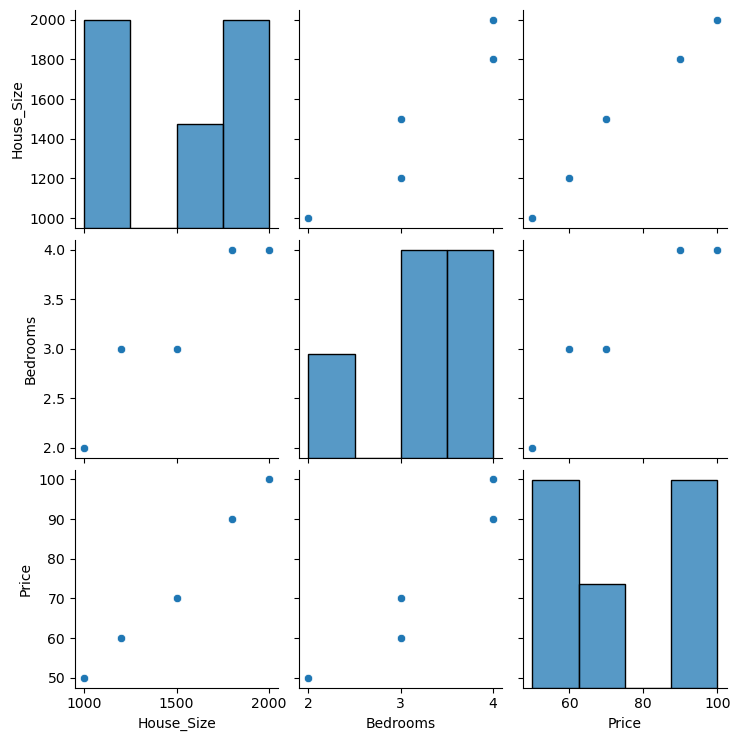

In [30]:
import seaborn as sns

# Checking Linearity
sns.pairplot(df)

# Checking for Multicollinearity
import statsmodels.api as sm
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

In [32]:
from sklearn.datasets import make_classification

# Generating a dummy dataset
X, y = make_classification(n_samples=1000, n_features=5, random_state=42)

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [36]:
y_pred = log_reg.predict(X_test)

In [38]:
from sklearn.metrics import confusion_matrix, classification_report

# Generating confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report (Includes Precision, Recall, F1-Score)
print("Classification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[89  8]
 [16 87]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.92      0.88        97
           1       0.92      0.84      0.88       103

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.88      0.88      0.88       200



In [40]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Example dataset: Email Messages
emails = [
    ("Buy now, special discount!", "spam"),
    ("Meeting at 5 PM", "ham"),
    ("Limited time offer, don't miss it!", "spam"),
    ("Project deadline extended", "ham"),
    ("Win a free iPhone, claim now!", "spam")
]

# Splitting data into texts and labels
X_texts, y_labels = zip(*emails)

# Convert text to numerical vectors using CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X_texts)

# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_labels, test_size=0.2, random_state=42)

# Train Naïve Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Predicting on test set
y_pred = nb_model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

In [44]:
iris = load_iris()
X = iris.data
y = iris.target

# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
knn = KNeighborsClassifier(n_neighbors=3)  # Choosing K=3
knn.fit(X_train, y_train)

# Predicting
y_pred = knn.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


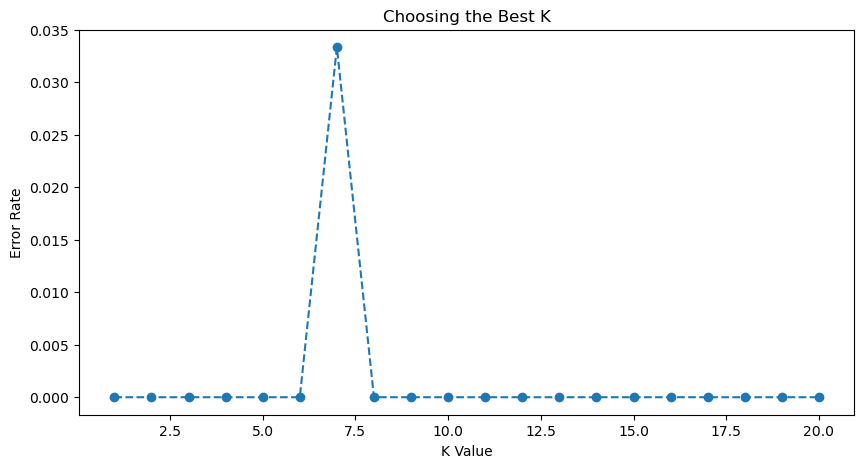

In [48]:
error_rate = []

# Testing different K values
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error_rate.append(np.mean(y_pred != y_test))

# Plot error rate
plt.figure(figsize=(10, 5))
plt.plot(range(1, 21), error_rate, marker='o', linestyle='dashed')
plt.xlabel("K Value")
plt.ylabel("Error Rate")
plt.title("Choosing the Best K")
plt.show()

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import tree

In [52]:
iris = load_iris()
X = iris.data
y = iris.target

# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
dt_classifier = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
dt_classifier.fit(X_train, y_train)

# Predicting
y_pred = dt_classifier.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


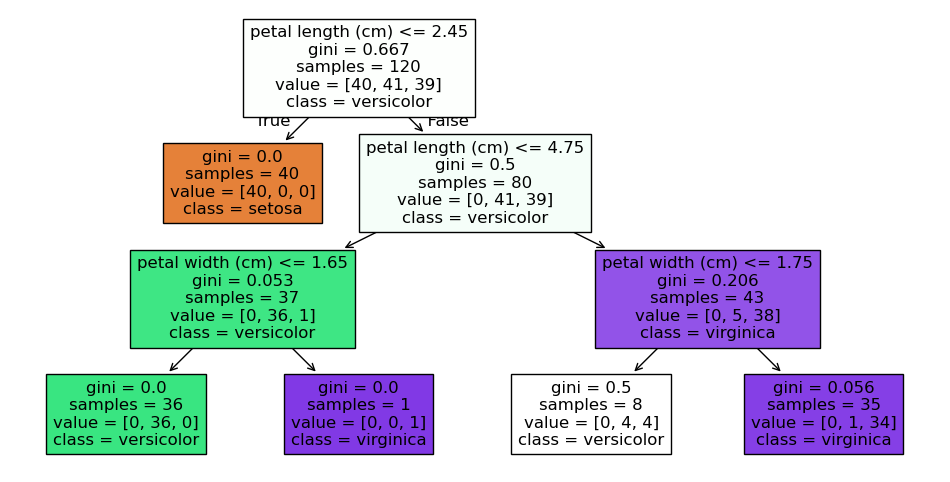

In [56]:
plt.figure(figsize=(12, 6))
tree.plot_tree(dt_classifier, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [60]:
# Generating synthetic data
np.random.seed(42)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])  # Adding some noise

# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
dt_regressor = DecisionTreeRegressor(max_depth=3, random_state=42)
dt_regressor.fit(X_train, y_train)

# Predicting
y_pred = dt_regressor.predict(X_test)

# Mean Squared Error
print("MSE:", mean_squared_error(y_test, y_pred))

MSE: 0.04963432432853545


C:\Users\alokg\AppData\Local\Temp\ipykernel_14856\102877912.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.01)[:, np.newaxis]


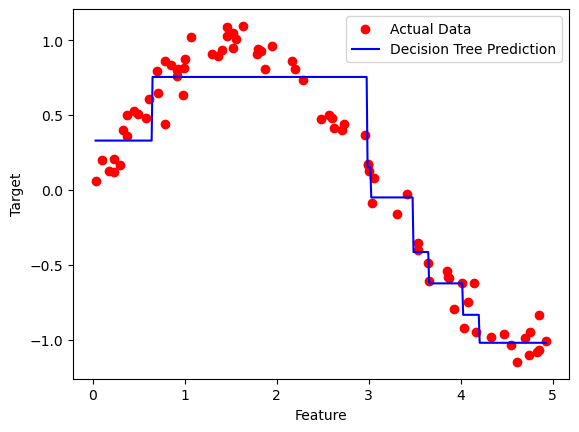

In [64]:
X_grid = np.arange(min(X), max(X), 0.01)[:, np.newaxis]
y_grid_pred = dt_regressor.predict(X_grid)

plt.scatter(X, y, color="red", label="Actual Data")
plt.plot(X_grid, y_grid_pred, color="blue", label="Decision Tree Prediction")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
plt.show()

In [66]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [68]:
# Load Titanic dataset from seaborn
import seaborn as sns
titanic = sns.load_dataset("titanic")

# Selecting relevant features
titanic = titanic[['survived', 'pclass', 'sex', 'age', 'fare']]
titanic.dropna(inplace=True)

# Converting categorical data
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})

X = titanic[['pclass', 'sex', 'age', 'fare']]
y = titanic['survived']

# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predictions
y_pred = rf_classifier.predict(X_test)

# Accuracy
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))

Random Forest Accuracy: 0.7622377622377622


In [72]:
from sklearn.ensemble import AdaBoostClassifier

In [74]:
adaboost_classifier = AdaBoostClassifier(n_estimators=50, random_state=42)
adaboost_classifier.fit(X_train, y_train)

# Predictions
y_pred_ada = adaboost_classifier.predict(X_test)

# Accuracy
print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred_ada))

AdaBoost Accuracy: 0.7482517482517482


C:\Users\alokg\anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [76]:
from sklearn.ensemble import GradientBoostingClassifier

In [78]:
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_classifier.fit(X_train, y_train)

# Predictions
y_pred_gb = gb_classifier.predict(X_test)

# Accuracy
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))

Gradient Boosting Accuracy: 0.7692307692307693


In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs

In [82]:
# Generating data with 3 clusters
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=1.05, random_state=42)

# Standardizing Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [84]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Adding Cluster Labels
df = pd.DataFrame(X_scaled, columns=['Feature1', 'Feature2'])
df['Cluster'] = clusters

C:\Users\alokg\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


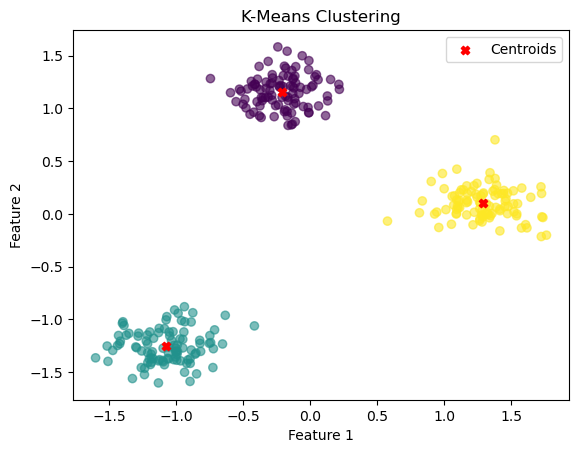

In [86]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', label='Centroids')
plt.title("K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()